<a href="https://colab.research.google.com/github/veiji/machine-learning/blob/main/notebooks/Classification_with_Scikit_Learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Learn with us: www.zerotodeeplearning.com

Copyright © 2021: Zero to Deep Learning ® Catalit LLC.

In [ ]:
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

Documentation links:

- [Google Colab](https://colab.research.google.com/notebooks/intro.ipynb)
- [Numpy](https://docs.scipy.org/doc/)
- [Pandas](https://pandas.pydata.org/docs/getting_started/index.html)
- [Pandas Cheatsheet](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf)
- [Matplotlib](https://matplotlib.org/)
- [Matplotlib Cheat Sheet](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Python_Matplotlib_Cheat_Sheet.pdf)
- [Seaborn](https://seaborn.pydata.org/)
- [Scikit-learn](https://scikit-learn.org/stable/user_guide.html)
- [Scikit-learn Cheat Sheet](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Scikit_Learn_Cheat_Sheet_Python.pdf)
- [Scikit-learn Flow Chart](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html)

# Classification with Scikit Learn

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Load data

In [2]:
url = "https://raw.githubusercontent.com/zerotodeeplearning/ztdl-masterclasses/master/data/"

In [3]:
df = pd.read_csv(url + 'geoloc_elev.csv')

### Exploration

In [4]:
df.head()

,lat,lon,elev,source,target
0,0.106264,0.068264,0.542477,S,1
1,0.099569,0.132094,0.722289,C,1
2,-0.775751,-0.814161,0.214760,S,0
3,-0.159833,0.040773,0.478576,S,1
4,-0.096395,0.021420,0.270322,C,1


In [ ]:
df.info()

In [5]:
df['source'].value_counts()

,count
source,
C,555
Q,476
S,469


In [ ]:
df['target'].value_counts()

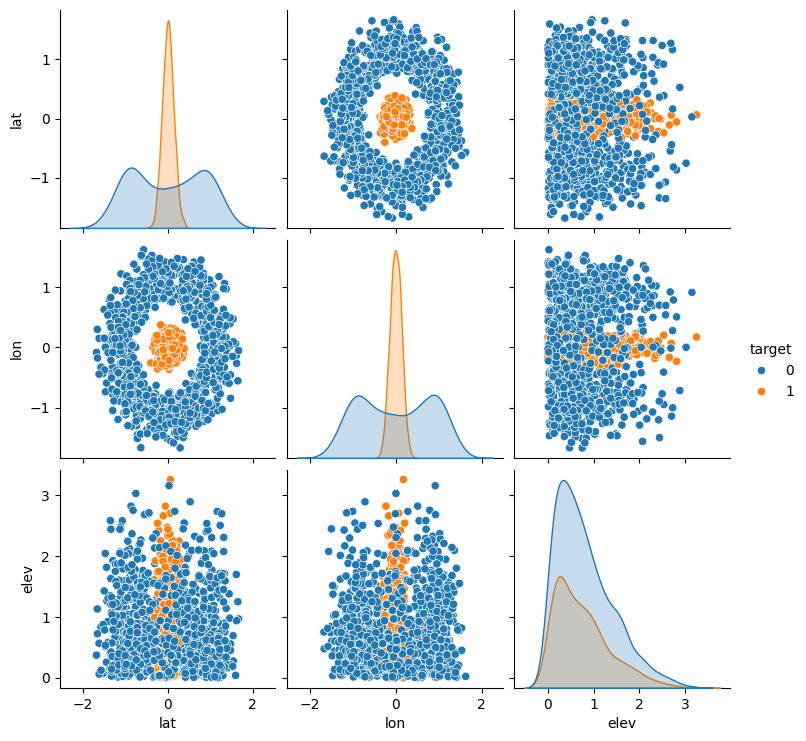

In [6]:
sns.pairplot(df, hue='target');

### Features and Labels

In [7]:
y = df['target']

In [8]:
raw_features = df.drop('target', axis=1)

# 1-hot encoding of categorical column "source"
X = pd.get_dummies(raw_features)

X.head()

,lat,lon,elev,source_C,source_Q,source_S
0,0.106264,0.068264,0.542477,False,False,True
1,0.099569,0.132094,0.722289,True,False,False
2,-0.775751,-0.814161,0.214760,False,False,True
3,-0.159833,0.040773,0.478576,False,False,True
4,-0.096395,0.021420,0.270322,True,False,False


### Model training and evaluation

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
    test_size = 0.3, random_state=0)

In [11]:
model = DecisionTreeClassifier(max_depth=3, random_state=0)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [12]:
y_pred = model.predict(X_test)

In [13]:
cm = confusion_matrix(y_test, y_pred)

pd.DataFrame(cm,
             index=["Miss", "Hit"],
             columns=['pred_Miss', 'pred_Hit'])

,pred_Miss,pred_Hit
Miss,285,26
Hit,6,133


In [16]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.92      0.95       311
           1       0.84      0.96      0.89       139

    accuracy                           0.93       450
   macro avg       0.91      0.94      0.92       450
weighted avg       0.94      0.93      0.93       450



### Decision Boundary

In [14]:
def plot_decision_boundary(model):
  hticks = np.linspace(-2, 2, 101)
  vticks = np.linspace(-2, 2, 101)

  aa, bb = np.meshgrid(hticks, vticks)
  a_flat = aa.ravel()
  b_flat = bb.ravel()
  N = len(a_flat)

  zeros = np.zeros((N, 4))
  ab = np.c_[a_flat, b_flat, zeros]

  c = model.predict(ab)

  cc = c.reshape(aa.shape)
  plt.contourf(aa, bb, cc, cmap='bwr', alpha=0.2)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


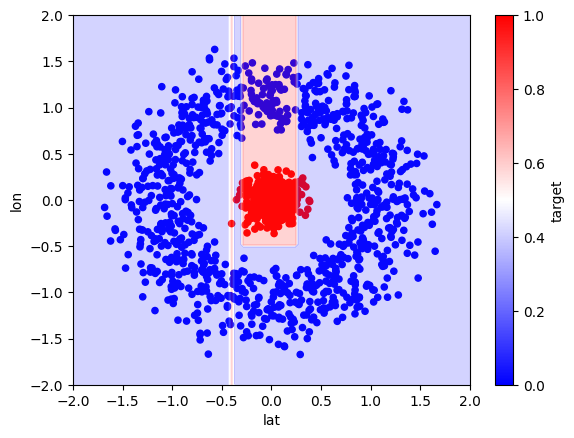

In [15]:
df.plot(kind='scatter', c='target', x='lat', y='lon', cmap='bwr')

plot_decision_boundary(model)

## Exercise 1


Iterate and improve on the decision tree model. Now you have a basic pipeline example. How can you improve the score? Try some of the following:

1. change some of the initialization parameters of the decision tree re run the code.
    - Does the score change?
    - Does the decision boundary change?
2. try some other model like Logistic Regression, Random Forest, SVM, Naive Bayes or any other model you like from [here](http://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html)
3. what's the highest score you can get?

An easy way to achieve all of the above is to define a function that trains and evaluates the model like this one:


```python
def train_eval(model):
  # YOUR CODE HERE
  
```

and then loop over a list of models:

```python
models = [...]

for model in models:
  train_eval(model)
```

Bonus points if you also measure the time it takes for each model to train

In [17]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from time import time

In [30]:
def get_confusion_matrix(y_true, y_pred):
  cm = confusion_matrix(y_true, y_pred)

  cm_df = pd.DataFrame(cm,
             index=["Miss", "Hit"],
             columns=['pred_Miss', 'pred_Hit'])

  return cm_df

def train_eval(model):

  # using the .values because the xgboost doesn't work well with pandas df.
  model.fit(X_train.values, y_train)
  y_pred_train = model.predict(X_train)
  y_pred_test = model.predict(X_test)

  train_acc = accuracy_score(y_train, y_pred_train)
  test_acc = accuracy_score(y_test, y_pred_test)

  title = f"Model: {model.__class__.__name__} Train Accuracy: {train_acc:.2f} Test Accuracy: {test_acc:.2f}"

  cm_df = get_confusion_matrix(y_test, y_pred)

  df.plot(kind='scatter', c='target', x='lat', y='lon', cmap='bwr')

  plot_decision_boundary(model)

  plt.title(title)

  # plotting the confusion matrix at the bottom
  plt.text(2, -2, str(cm_df), horizontalalignment='right', bbox = {'facecolor':'white'})

  plt.show()



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


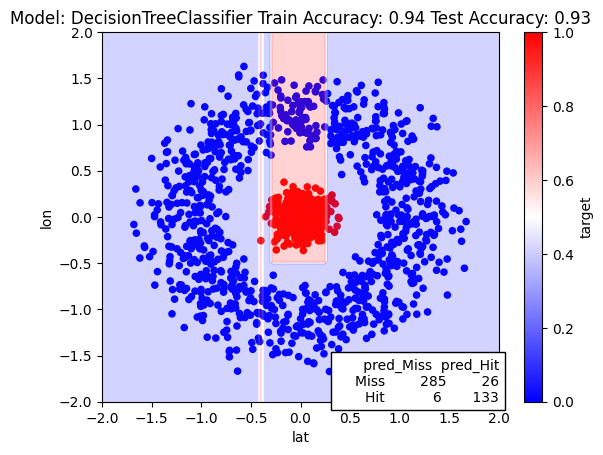

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


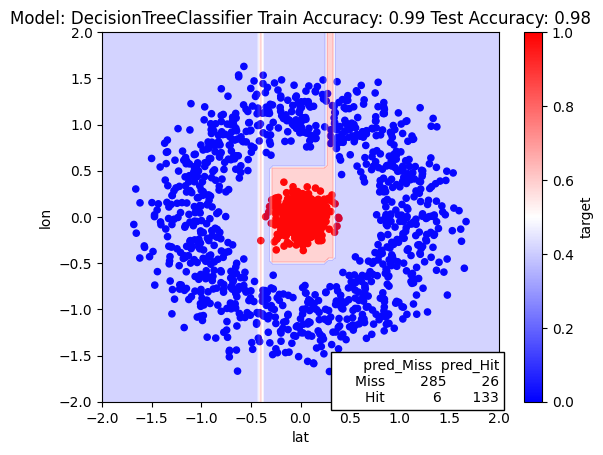

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


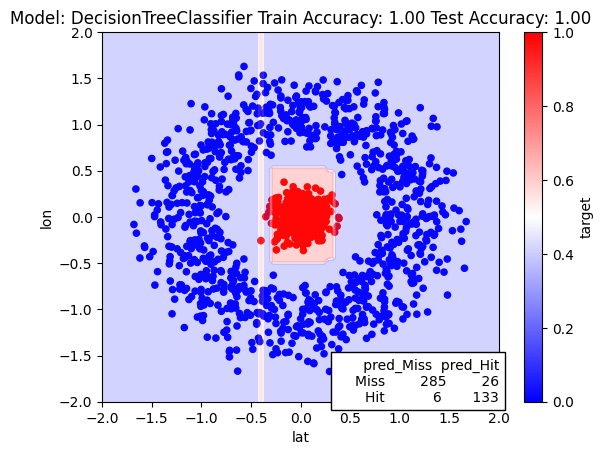

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


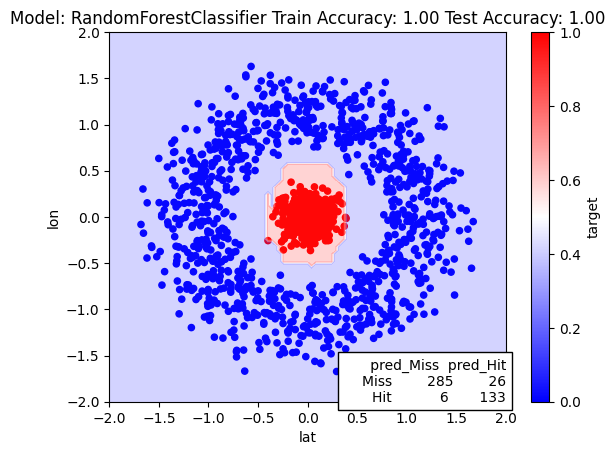

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but ExtraTreesClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but ExtraTreesClassifier was fitted without feature names
  warnings.warn(


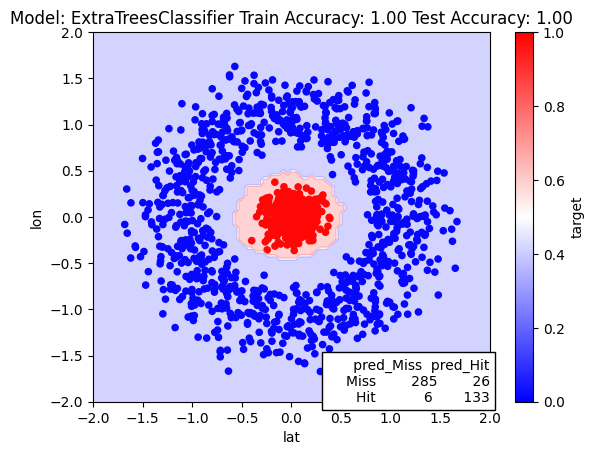

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


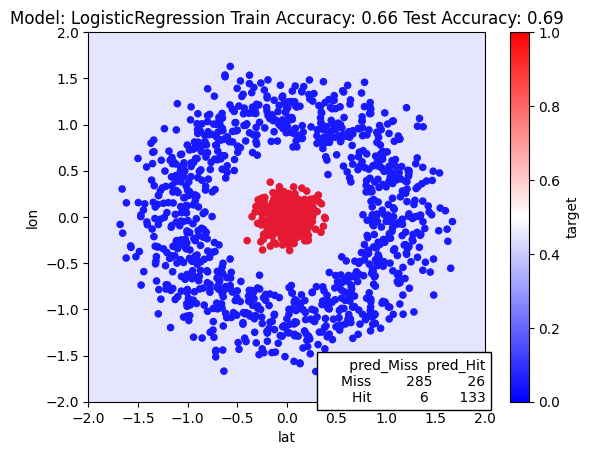

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


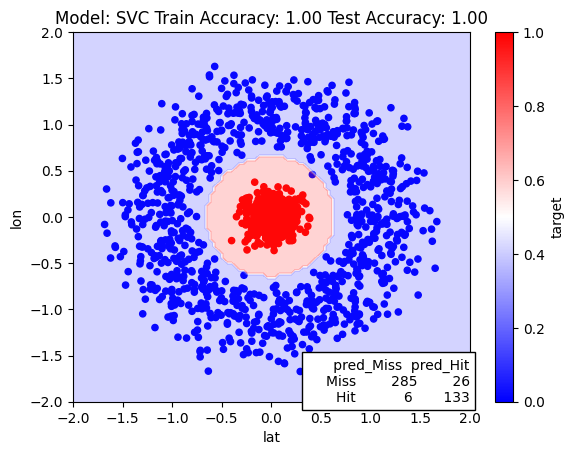

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(


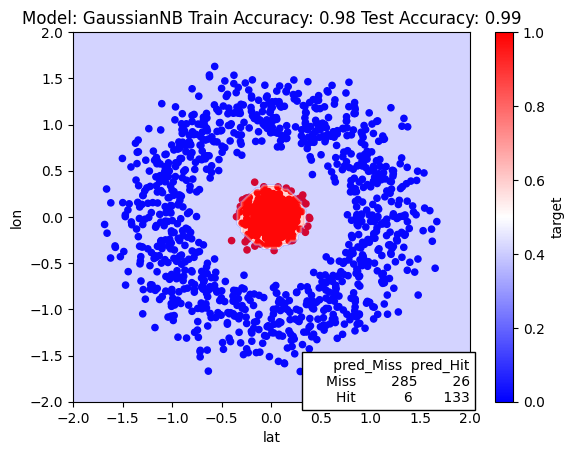

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(


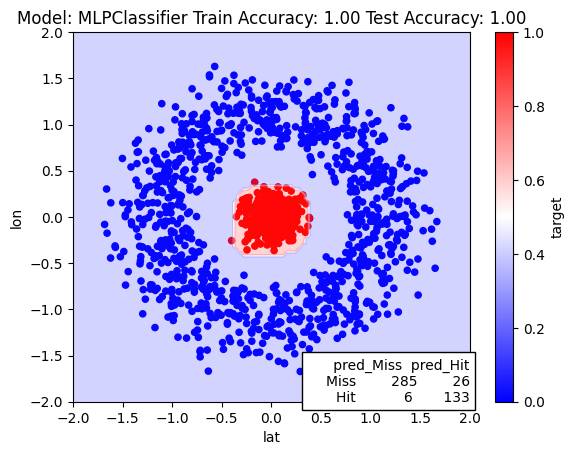

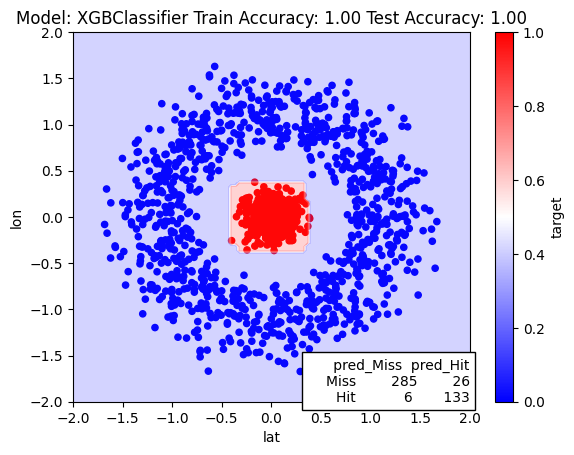

In [31]:
models = [
          DecisionTreeClassifier(max_depth=3, random_state=0),
          DecisionTreeClassifier(max_depth=4, random_state=0),
          DecisionTreeClassifier(max_depth=5, random_state=0),
          RandomForestClassifier(),
          ExtraTreesClassifier(),
          LogisticRegression(),
          SVC(),
          GaussianNB(),
          MLPClassifier(),
          XGBClassifier()
]

for model in models:
  train_eval(model)

### Exercise 2


- load the churn dataset `churn.csv`
- assign the `Churn` column to a variable called `y`
- assign the other columns to a variable called `features`
- select numerical columns with `features.select_dtypes` and asign them to a variable called `X`
- split data into train/test with test_size=0.3 and random_state=42
- modify the `train_eval` function defined earlier to test and compare different models and hyperparameters combinations.

You can find a list of models available [here](http://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html).


### Exercise 3

Define a new function that also keeps track of the time required to train the model. Your new function will look like:

```python
def train_eval_time(model):
  # YOUR CODE HERE
  
  return model, train_acc, test_acc, dt
```

In [ ]:
from time import time